In [1]:
import os

from dotenv import load_dotenv
from neo4j import GraphDatabase
import matplotlib.pyplot as plt

import pandas as pd

load_dotenv()
# pull env vars for auth and create neo4j driver
NEO4J_AUTH = (os.getenv("NEO4J_USER"), os.getenv("NEO4J_PASS"))
NEO4J_URI = os.getenv("NEO4J_URI")
NEO4J_DRIVER = GraphDatabase.driver(NEO4J_URI, auth=NEO4J_AUTH)
SESSION = NEO4J_DRIVER.session()

In [7]:
with NEO4J_DRIVER.session() as session:
    result = session.run(
        """
        WITH range(0,52) AS weekNumberList UNWIND weekNumberList AS weekNumber
        WITH date("2020-01-01") + duration({weeks: weekNumber}) AS startDate, 10 AS baselineYears
        WITH startDate, range(1, baselineYears) as baselineRange
        MATCH (country:Country {name: "Australia" })
        MATCH (country)<-[:IN]-(report:Report)
        UNWIND baselineRange AS yearDiff
        WITH country, report, startDate, (startDate - duration({years: yearDiff})) AS date 
        WHERE date - duration({days: 15}) < report.start < date + duration({days: 15})
        WITH startDate, avg(toFloat(report.positive) / report.processed) AS baseline
        MATCH (country:Country {name: "Australia" })<-[:IN]-(report:Report)
        WHERE report.start < startDate < report.start + report.duration
        WITH startDate, baseline, toFloat(report.positive) / report.processed AS day
        WITH startDate, baseline, day, day - baseline AS delta
        return startDate, day, baseline, delta
        """
    )

    df = pd.DataFrame(result, columns=result.keys())
df

,startDate,day,baseline,delta
0,2020-01-01,0.041136,0.083344,-0.042208
1,2020-01-01,0.041136,0.083344,-0.042208
2,2020-01-08,0.053619,0.086442,-0.032823
3,2020-01-08,0.053619,0.086442,-0.032823
4,2020-01-15,0.059134,0.082922,-0.023788
5,2020-01-15,0.059134,0.082922,-0.023788
6,2020-01-22,0.096581,0.085706,0.010876
7,2020-01-29,0.061135,0.092282,-0.031147
8,2020-02-05,0.058394,0.090802,-0.032408
9,2020-02-12,0.053175,0.094025,-0.040850


<AxesSubplot:xlabel='startDate'>

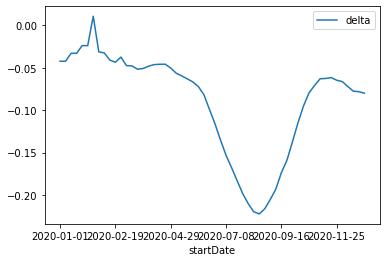

In [8]:
df.plot(x="startDate", y="delta")